### Nagendra Babu
### Data Science and Business Analytics Internship @ The Sparks Foundation
#### GRIPMAY21

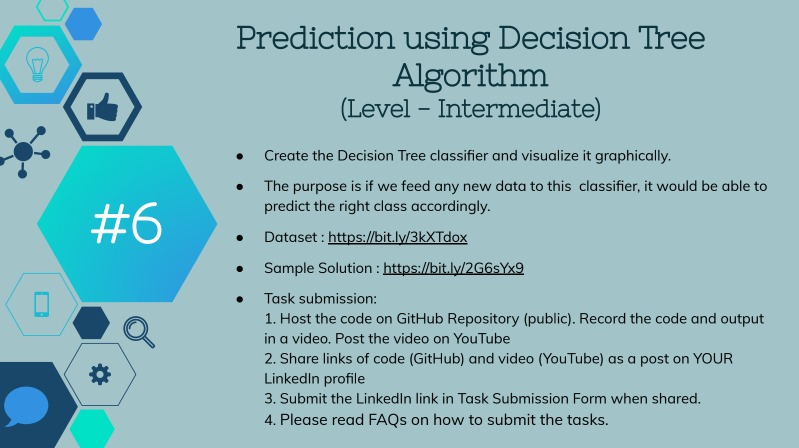

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

### Importing the Iris dataset¶

In [3]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [6]:
#how many data points for each class are present?
iris_data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

Knowing missing values

In [7]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### Visualising the sepal and petal dimensions¶

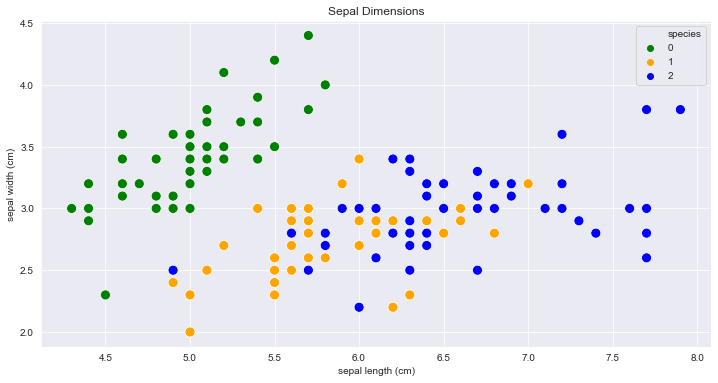

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris_data["sepal length (cm)"], 
                y=iris_data["sepal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);


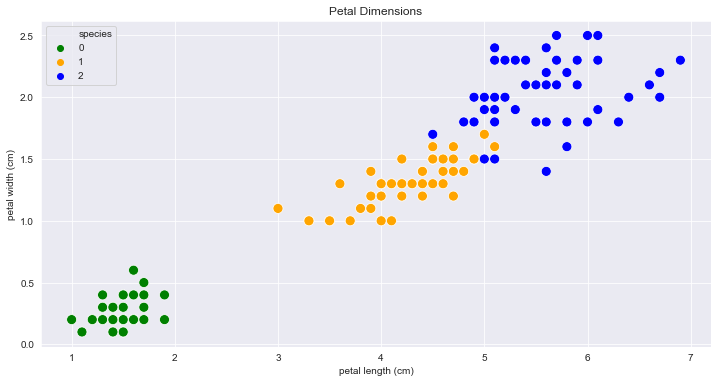

In [23]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["petal length (cm)"], 
                y=iris_data["petal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);


### Analysing correlation between feature and Target

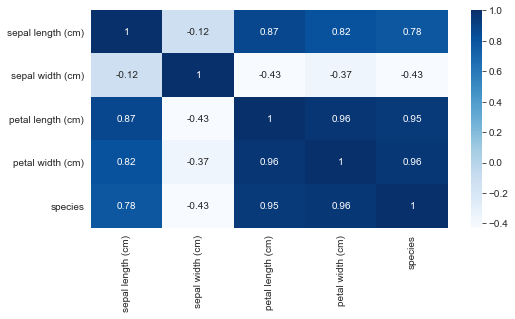

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues');

### Splitting The Data into Training And Testing Dataset

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)

In [12]:
train.shape, test.shape

((120, 5), (30, 5))

In [13]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9333333333333333


The most commonly used Performance metrics for classification problem are as follows,
- Accuracy
- Confusion Matrix
- Precision, Recall, and F1 score
- ROC AUC
- Log-loss


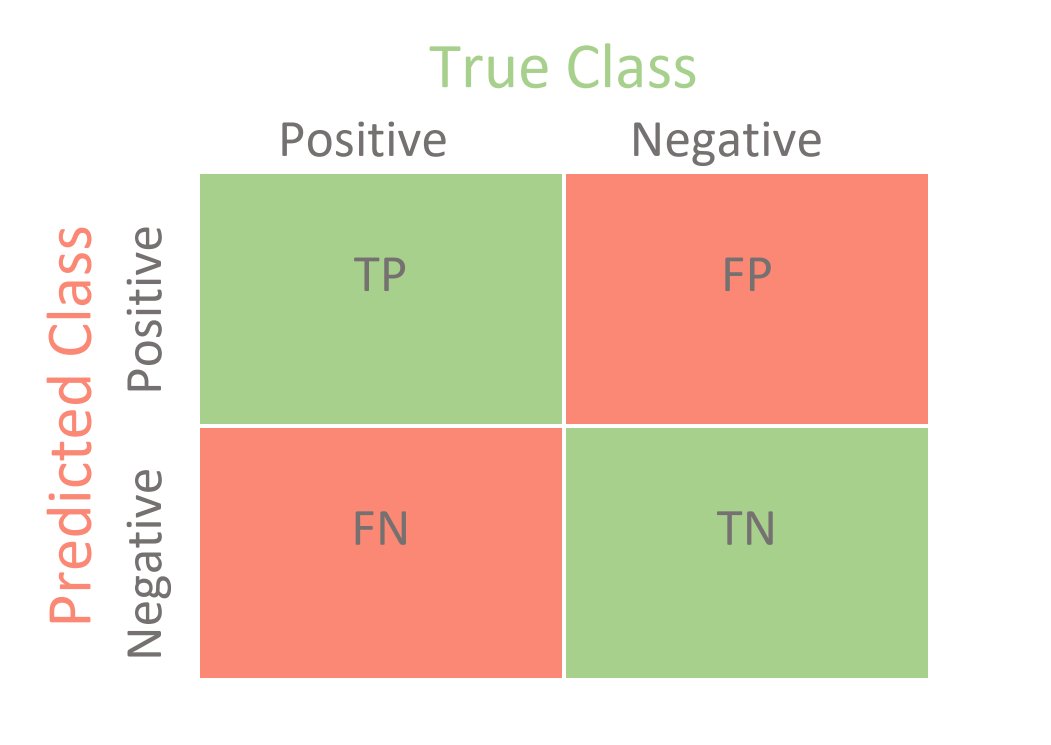

#### Precision, Recall, and F-1 Score

Precision is the fraction of the correctly classified instances from the total classified instances. 

Recall is the fraction of the correctly classified instances from the total classified instances. Precision and recall are given as follows

precision = TP/TP+FP

Recall = TP/TP+FN


In [22]:
test.shape

(30, 5)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

[[ 6  0  0]
 [ 0 13  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.93      0.93      0.93        14
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [17]:
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = iris_data.species

In [18]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


### Let us visualize the Decision Tree to understand it better

In [19]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y
!conda install graphviz

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Solving environment: ...working... done

# All requested packages already installed.



In [20]:
#conda install graphviz
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

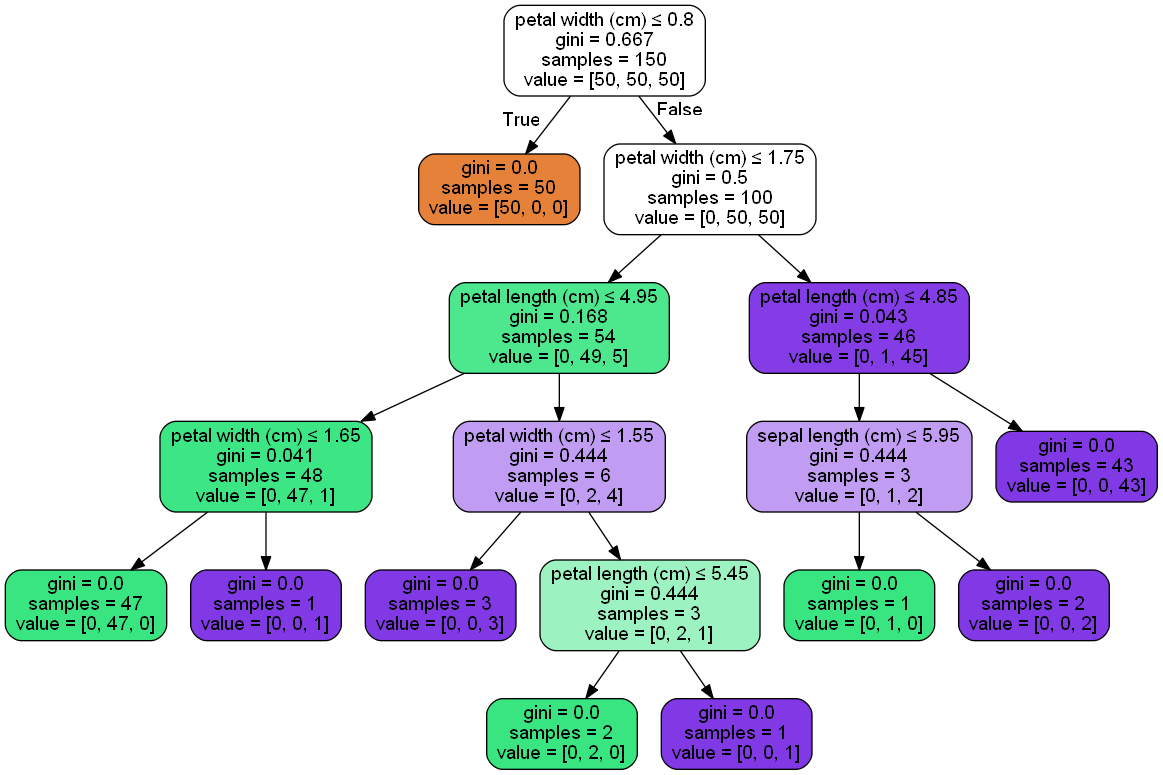

In [21]:
# Import necessary libraries for graph viz
from six import StringIO  #from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree1, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
